# Kernel Density Estimation

Kernel density estimation is the process of estimating an unknown probability density function using a kernel function K(u). While a histogram counts the number of data points in somewhat arbitrary regions, a kernel density estimate is a function defined as the sum of a kernel function on every data point.

In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample. In some fields such as signal processing and econometrics it is also termed the Parzen–Rosenblatt window method, after Emanuel Parzen and Murray Rosenblatt, who are usually credited with independently creating it in its current form.

One of the famous applications of kernel density estimation is in estimating the class-conditional marginal densities of data when using a naive Bayes classifier, which can improve its prediction accuracy.

### 1. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x, of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be
:$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
* you can use the scipy function stats.norm() for that.
In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the scipy.integrate.trapz() method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.stats import norm
import pandas as pd
import seaborn as sns
import scipy as sc

In [2]:
# Fill a numpy array, x, of len(N) (with N=O(100)) with a variable normally distributed
N = 100
mu = 10
sigma = 50
x = np.random.normal(mu, sigma, N)

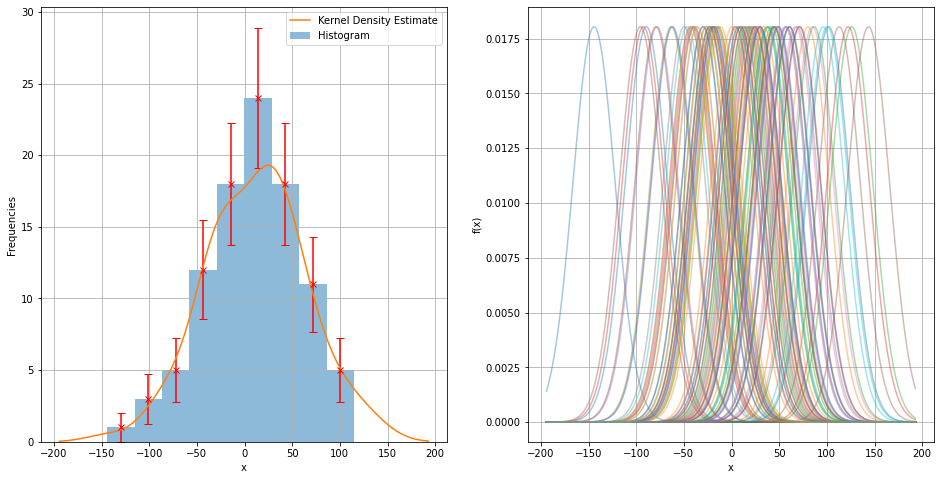

In [3]:
# Create histogram
# use a meaningful number of bins
Nbins = 10

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

freq, bins, patches  = ax1.hist(x,label='Histogram', alpha=0.5,bins=np.arange(x.min(), x.max(), (x.max()-x.min())/Nbins))
bincenters = (bins[1:] + bins[:-1])/2
ax1.errorbar(x=bincenters, y=freq, yerr=np.sqrt(freq), fmt='o', c='r', marker='x', markersize=6, capsize=4)

ax1.grid()
ax1.set_xlabel('x')
ax1.set_ylabel('Frequencies')

# Create Gaussians
# for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned.
std_default = 1.06 * x.std() * (x.size ** -0.2)

xrange = np.arange(x.min()-sigma, x.max()+sigma)
gaussians = []
for i, dat in enumerate(x):
    gaussians.append( norm(loc=dat, scale=std_default).pdf(xrange) )
    ax2.plot(xrange, gaussians[i], alpha=0.4)
ax2.set_xlabel('x')
ax2.set_ylabel('f(x)')
ax2.grid()

# Create KDE
area = integrate.trapz(freq, dx=bins[1]-bins[0])
kde = np.array(gaussians).sum(axis=0)
ax1.plot(xrange, kde/sum(kde)*area, label='Kernel Density Estimate')
ax1.legend()

plt.show()

### Matplotlib Scatter Plot
Scatter plot are useful to analyze the data typically along two axis for a set of data. It shows the relationship between two sets of data.

### 2. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
Display the dataset in a scatter plot marking the two categories with different marker colors.
An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

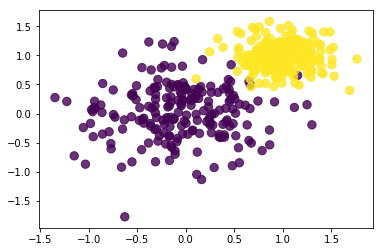

In [4]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

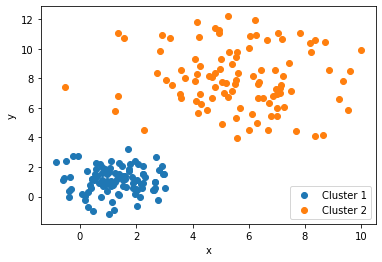

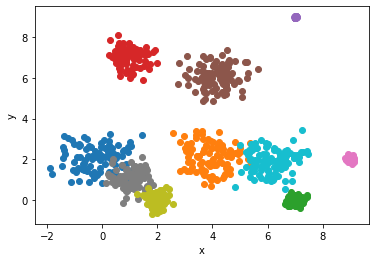

In [5]:
sigma1, sigma2 = 1,2
center1 = (1,1)                                                                                    
center2 = (3,4) 
points = np.random.normal(size=(100,4))
points[:,0] += center1[0]
points[:,1] += center1[1]
points[:,2] += center2[0]
points[:,3] += center2[1]
points[:,:2] *= sigma1
points[:,2:] *= sigma2

plt.scatter(points[:,0], points[:,1], label='Cluster 1')
plt.scatter(points[:,2], points[:,3], label='Cluster 2')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

n = 10
sigmas = np.random.rand(n)    
centers = np.random.randint(0,10,size=(n, 2))
points = np.random.normal(size=(100, 2*n))
points[:,::2] *= sigmas
points[:,1::2] *= sigmas
points[:,0::2] += centers[:,0]
points[:,1::2] += centers[:,1]
for i in range(n):
    plt.scatter(points[:,i*2],points[:,i*2+1])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### 3. **Profile plot**

Produce a profile plot from a scatter plot.

* Download the following dataset and load it as a pandas dataframe:
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

* Note that you should use the np.load() function to load the file as a numpy array, call the .item() method, and then pass it to the pd.DataFrame() constructor.

* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using scipy.stats.linregress()
* plot a seaborn jointplot of "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
* x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
* y, the mean values of the "residuals", estimated in slices (bins) of "distance"
* erry, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [6]:
data = np.load("residuals_261.npy", allow_pickle=True)
df = np.array([data[np.newaxis][0]["residuals"],data[np.newaxis][0]["distances"]]).T
df = pd.DataFrame(df)
df.columns = ["residuals","distances"]
# Clean the samples
df = df[abs(df["residuals"])<2]
df.describe()

,residuals,distances
count,10489.000000,10489.000000
mean,-0.121878,9.954824
std,0.439143,5.847142
min,-2.000000,0.000000
25%,-0.280000,4.700000
50%,-0.100000,10.000000
75%,0.070000,15.100000
max,1.992857,24.900000


In [7]:
# Linear regression
reg = sc.stats.linregress(df["distances"], df["residuals"])


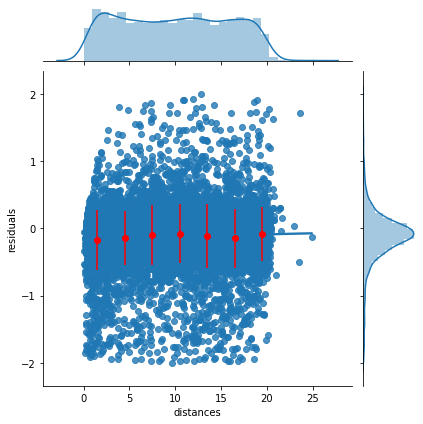

In [8]:
# Plot x, y, res
x = np.linspace(0,21,8)
binned = []
k = 0 
for j in x[1:]: 
    binned.append(df.query("distances<{} & distances>={}".format(j,k))["residuals"].values) 
    k = j 
      
y = list(map(lambda p: p.mean(),binned))
yerr = list(map(lambda p: p.std(),binned))

joint = sns.jointplot("distances", "residuals", data=df, kind="reg")
joint.ax_joint.errorbar((x[:-1]+x[1:])/2, y, yerr=yerr, fmt='o', c='r')

plt.show()